In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [3]:
RUNS = range(10)
BOUNDS = ['Uniform', 'PBkl', 'PBkl_inv', 'TND_DIS', 'TND_DIS_inv', 'TND', 'TND_inv', 'DIS', 'DIS_inv', 'Cbound', 'C_TND']

In [4]:
def plot_results_grid(exps, m, runs=len(RUNS), bounds=BOUNDS):

    sns.set_style(style="ticks")
    bounds_palette = sns.color_palette("viridis", n_colors=len(bounds)+1)
    risk_palette = sns.color_palette("flare", n_colors=len(bounds)+1)
    risk_palette.reverse()

    num_views = len(exps['View'].unique())
    num_cols = num_views // 2 + num_views % 2  # Calculate number of columns for subplots

    fig, ax = plt.subplots(2, num_cols, figsize=(14, 10), sharey=True)

    for i, view in enumerate(exps['View'].unique()):
        view_data = exps[exps['View'] == view]
        row = i // num_cols
        col = i % num_cols
        
        risk = view_data.groupby(["Bound_name", "View"])['Risk'].mean()
        mean_risk = risk.median()
        # up_risk = mean_risk+risk.std()
        # lw_risk = mean_risk-risk.std()
        # print(mean_risk, up_risk, lw_risk)
        # Plot Bound
        sns.barplot(x='Bound_name', y='Bound', data=view_data, ax=ax[row, col], hue='Bound_name', hatch='.', palette=bounds_palette)        # Create a horizontal line at the median risk
        sns.barplot(x='Bound_name', y='Risk', data=view_data, ax=ax[row, col], hue='Bound_name', hatch='\\', palette=risk_palette)

        # ax[row, col].axhline(y=up_risk, color='b', linestyle='-', label='Q3 Risk')
        # ax[row, col].axhline(y=lw_risk, color='r', linestyle='--', label='Median Risk')
        # ax[row, col].axhline(y=mean_risk, color='g', linestyle='-', label='Q1 Risk')
        ax[row, col].set_title(f'{view}')
        ax[row, col].set_xlabel('Bounds')
        ax[row, col].set_ylabel('Means')
        plt.setp( ax[row, col].xaxis.get_majorticklabels(), rotation=70 )

        

    # handles, labels = ax[0,0].get_legend_handles_labels()
    # labels = [labels[i]+" bound" if i < len(labels)/2 else labels[i]+" Gibbs risk" for i in range(len(labels))]
    # ax[0, 0].legend(handles, labels, title='Bounds', loc='upper right', fontsize='medium')
    fig.suptitle(f'Test error rates and multiview PAC-Bayesian bound values, {m=},\naveraged over {runs} runs')
    fig.tight_layout()
    # plt.savefig(f'Multiple-Features_4vs9_20runs.pdf', bbox_inches='tight')
    plt.show()

In [7]:
path = "~/Multi-View-Majority-Vote-Learning-Algorithms-Direct-Minimization-of-PAC-Bayesian-Bounds/results/s_labeled-5/alpha-1.1/weak_learner/Multiple-Features_4vs9_10runs.csv"
df = pd.read_csv(path, delimiter=" ")
df["Risk"] = df["Risk"].astype(float)
df["Bound"] = df["Bound"].astype(float)

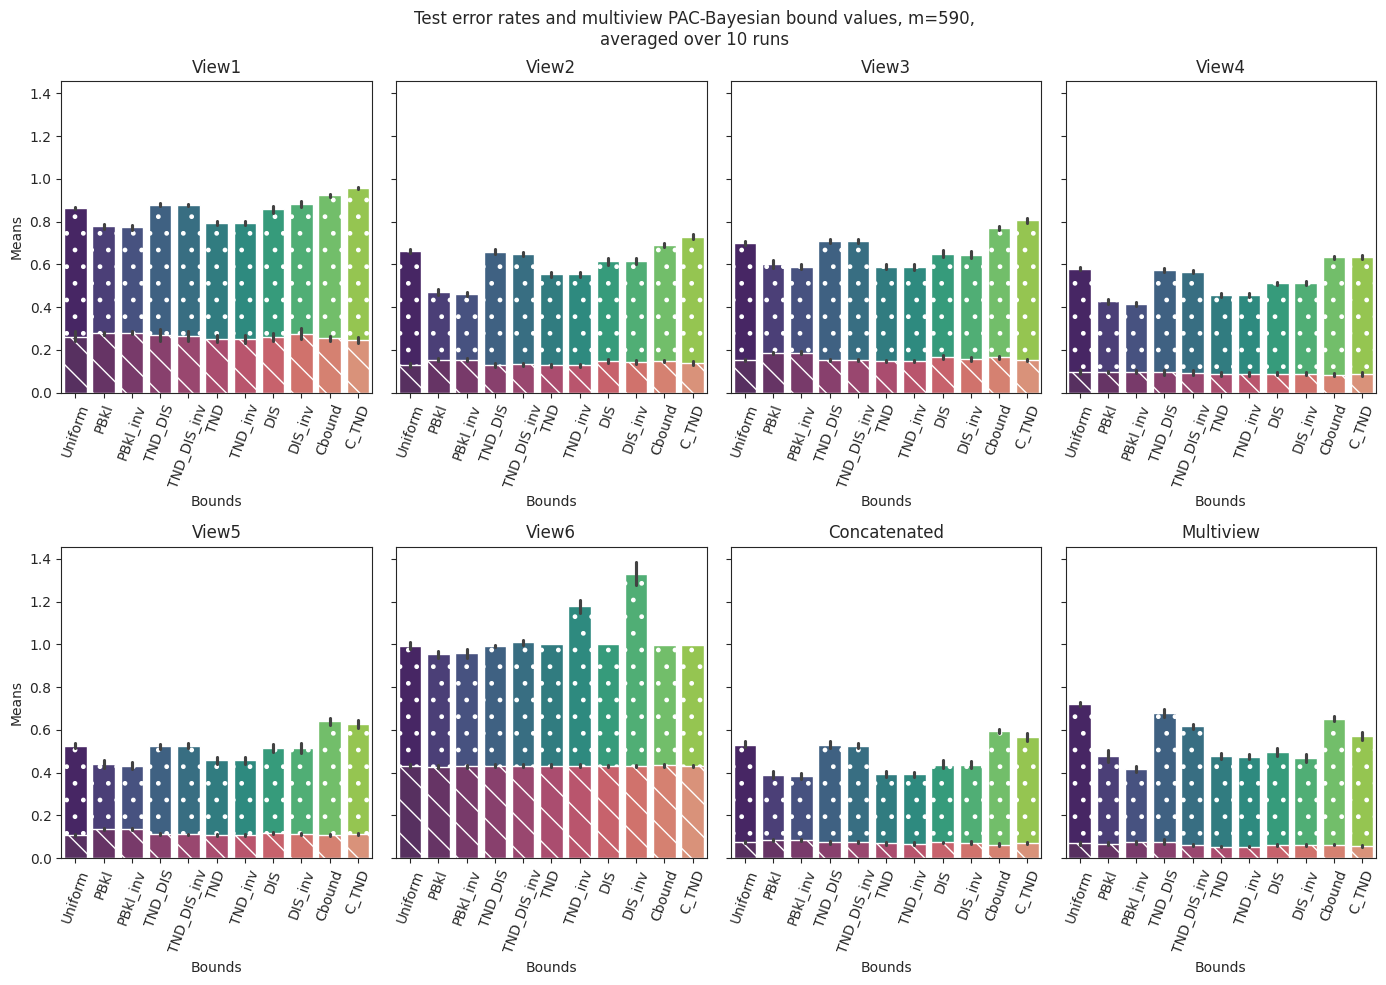

In [8]:
plot_results_grid(df, 590)

In [9]:
!pdftoppm -png -r 300 "Multiple-Features_4vs9_20runs.pdf" "Multiple-Features_4vs9_20runs.png"

/bin/bash: line 1: pdftoppm: command not found


In [6]:
df.iloc[10:20]

,Run,Bound_name,View,Risk,Gibbs_Risk,Bound,Join_Error,Disagreement,KL_QP,KL_RhoPi,n_labeled,n_all,Posterior_Qv,Posterior_rho
10,1,PBkl,Concatenated,0.182,0.102,0.324,0.028,0.148,1.569,NaN,560.0,560.0,"['0.000803276', '0.001263389', '0.000965531', ...",NaN
11,1,PBkl,Multiview,0.209,0.143,0.396,0.046,0.194,-0.488,-0.520,560.0,560.0,"[['0.012781709', '0.030070042', '0.001164936',...","['0.004172287', '0.987348318', '0.004367935', ..."
12,1,PBkl_inv,View1,0.225,0.148,0.430,0.053,0.190,1.433,NaN,560.0,560.0,"['0.002461565', '0.023764301', '0.000821617', ...",NaN
13,1,PBkl_inv,View2,0.212,0.145,0.424,0.052,0.186,1.441,NaN,560.0,560.0,"['0.125510663', '0.000811851', '0.000804871', ...",NaN
14,1,PBkl_inv,View3,0.239,0.150,0.434,0.051,0.198,1.366,NaN,560.0,560.0,"['0.000755137', '0.002515634', '0.000747038', ...",NaN
15,1,PBkl_inv,View4,0.249,0.147,0.429,0.051,0.193,1.317,NaN,560.0,560.0,"['0.010083140', '0.000864769', '0.001446996', ...",NaN
16,1,PBkl_inv,Concatenated,0.180,0.102,0.325,0.028,0.148,1.671,NaN,560.0,560.0,"['0.000727049', '0.001127419', '0.000752465', ...",NaN
17,1,PBkl_inv,Multiview,0.208,0.143,0.396,0.046,0.193,-0.497,-0.526,560.0,560.0,"[['0.010468054', '0.032658342', '0.000972136',...","['0.003866697', '0.988270044', '0.003999233', ..."
18,1,TND_DIS,View1,0.218,0.174,0.534,0.058,0.307,0.002,NaN,560.0,11201.0,"['0.010197175', '0.010169161', '0.010040263', ...",NaN
19,1,TND_DIS,View2,0.217,0.171,0.524,0.055,0.304,0.001,NaN,560.0,11201.0,"['0.010950848', '0.009834747', '0.009380502', ...",NaN
